# 25)
#### Para un disco exponencial, infinitesimálmente fino, su distribución de densidad superficial está dada por
### $\Sigma(R) = \Sigma_0 e^{-\frac{R}{R_d}}$
#### Y su masa total la calculamos como
### $M_d = 2\pi \int_0^{\infty} \Sigma(R) R dR = 2 \pi \Sigma_0 R_d^2$

# 26)

#### Dada la distribución de un disco exponencial *(como el de* **25)** *)*, su potencial es de la forma
### $\Phi(R,z) = -2 \pi G \Sigma_0 R_d^2 \int^\infty_0 \frac{J_0(xR)e^{-x|z|}}{[1+(xR_d)^2]^{3/2}}dx$
#### Para graficar las curvas equipotenciales del disco, separemos el plano $(X,Y)$ (con $z=0$) y el $(R,z)$. 

#### Para el caso de $z=0$, el potencial se puede obtener analíticamente, y resulta
### $\Phi(R,0) = -\pi G \Sigma_0R [ I_0(y)K_1(y)-I_1(y)K_0(y)) ]$; $y = \frac{R}{2R_d}$
#### Grafiquemos:

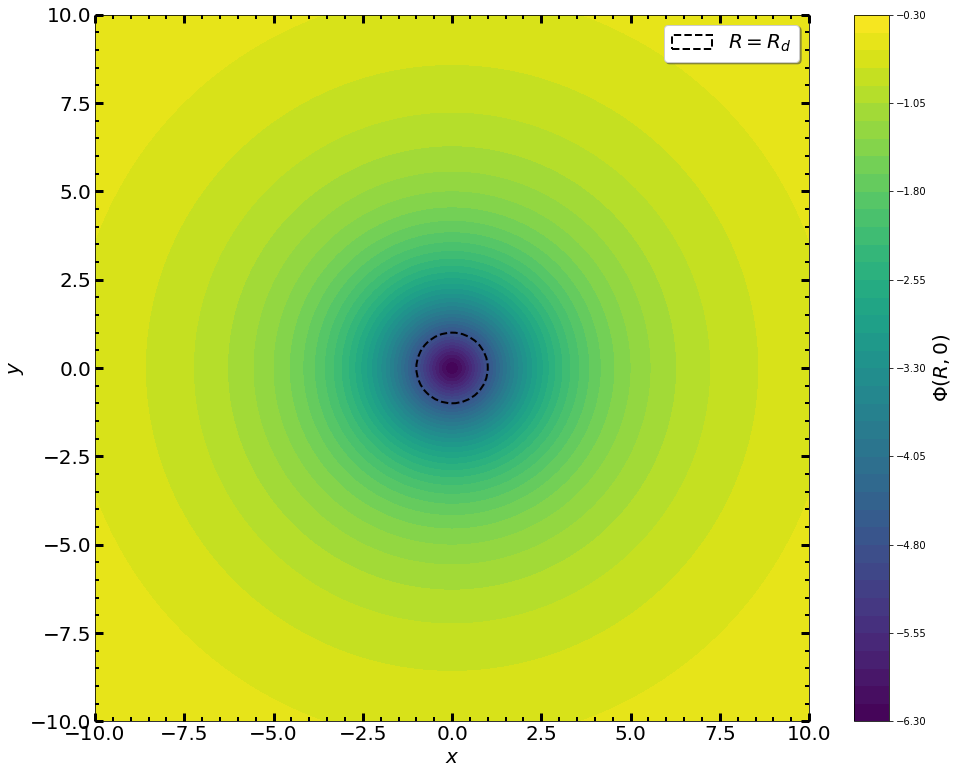

In [1]:
import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
from scipy import stats as st
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                           AutoMinorLocator)
from numpy import linalg as LA

#As always, las ctes:
rd = 1
G = 1
s0 = 1

#Y las funcs especiales para 2.164a BT:

from scipy.special import kn,i0,i1

def pot(x,y):
    R = np.sqrt(x**2+y**2)
    Y = 0.5*R*rd
    
    phi = -np.pi*G*s0*R*(i0(Y)*kn(1,Y)-i1(Y)*kn(0,Y))
    
    return phi

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y) #El dominio 2D

Phi = pot(X,Y)

plt.figure(figsize=(16,13))

cp = plt.contourf(X,Y,Phi,50)
cbar = plt.colorbar(cp)
cbar.set_label(label='$\Phi(R,0)$',size=20)

radio = plt.Circle((0,0),rd,color='k',fill=False,ls='--',lw=2,label='$R = R_d$')
plt.gca().add_patch(radio)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

#### *Si es que suma, lo ploteemos en 3D:*

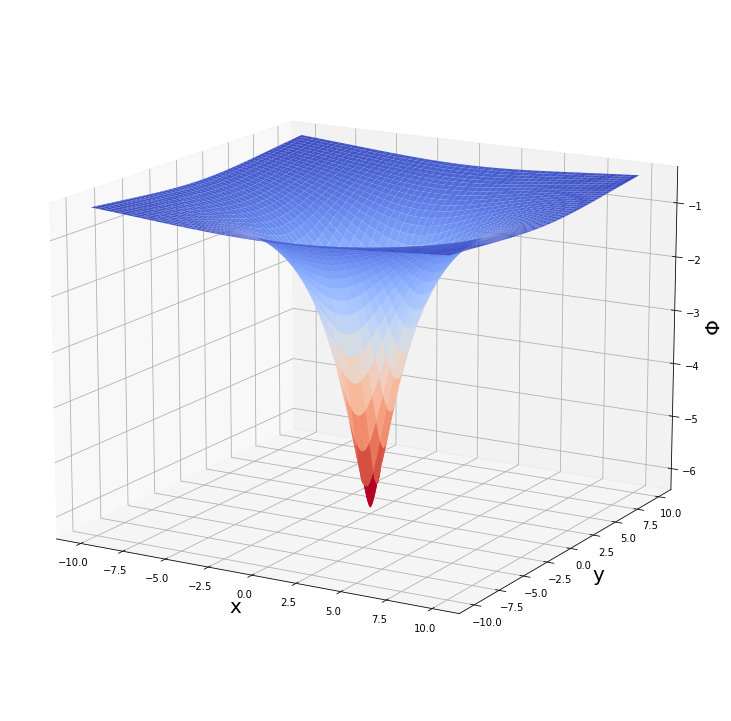

In [4]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(13)
fig.set_figwidth(13)
surf = ax.plot_surface(X, Y, Phi, cmap=cm.coolwarm_r,
                       linewidth=0, antialiased=True)
ax.set_xlabel("x",size=20)
ax.set_ylabel("y",size=20)
ax.set_zlabel("$\Phi$",size=20)

ax.view_init(elev=15.);

#### Ahora para el caso general
### $\Phi(R,z) = -2 \pi G \Sigma_0 R_d^2 \int^\infty_0 \frac{J_0(xR)e^{-x|z|}}{[1+(xR_d)^2]^{3/2}}dx$
#### Debemos resolver la integral numéricamente. Grafiquemos:

<ipython-input-5-e700ab523e83>:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Phi[j,i] = -2*np.pi*G*s0*(rd**2)*quad(integrand,0,np.inf,args=(R[i],z[j]))[0]


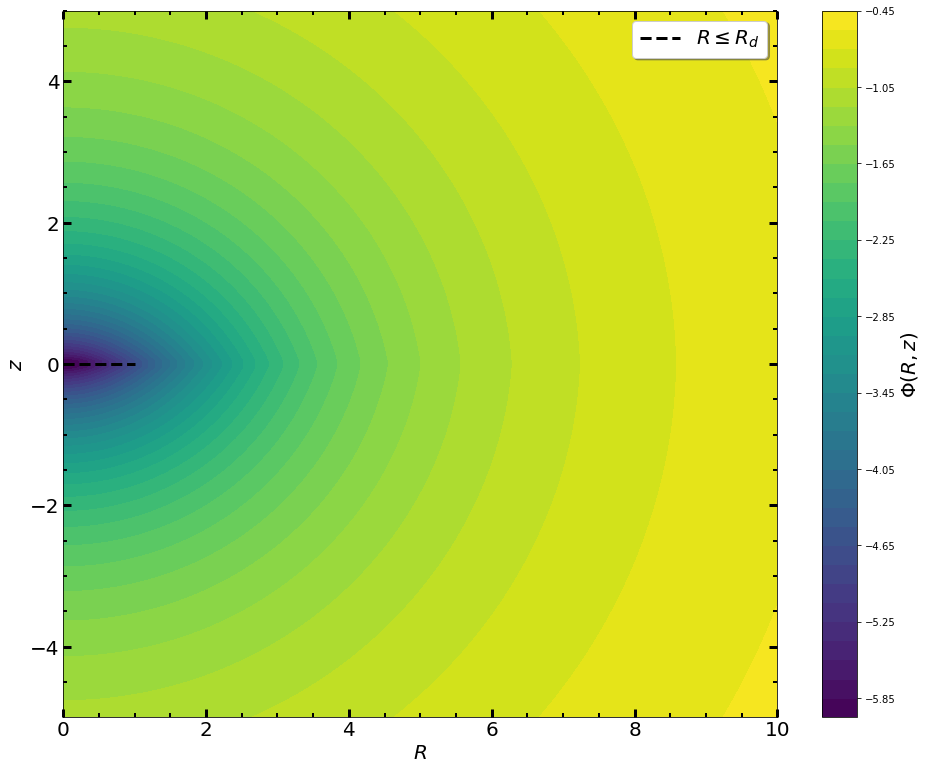

In [5]:
from scipy.special import j0
from scipy.integrate import quad

#Def la func a integrar
def integrand(x,R,z):
    aux1 = j0(x*R)*np.exp(-x*np.abs(z))
    aux2 = (1+(x*rd)**2)**1.5
    return aux1/aux2

R = np.linspace(0.01,10,100)
z = np.linspace(-5,5,100)

X,Y = np.meshgrid(R,z) #¿Es necesario? *Y, para crear un contourf, si...

"""#Try2, debo vectorizar:
def integ_grid(f,R,z):
    return np.vectorize(quad(f,0,np.inf,args=(R,z)))

Phi = integ_grid(integrand(x,X,Y))""";

#Sin el meshgrid, a mano:

Phi = np.empty([len(R),len(z)])

for i in range(len(R)):
    for j in range(len(z)):
        Phi[j,i] = -2*np.pi*G*s0*(rd**2)*quad(integrand,0,np.inf,args=(R[i],z[j]))[0]
        
plt.figure(figsize=(16,13))

cp = plt.contourf(X,Y,Phi,50)
cbar = plt.colorbar(cp)
cbar.set_label(label='$\Phi(R,z)$',size=20)

plt.plot([0,1],[0,0],c='k',lw=3,ls='--',label='$R \leq R_d$')

#radio = plt.Circle((0,0),rd,color='k',fill=False,ls='--',lw=2,label='$R = R_d$')
#plt.gca().add_patch(radio)

plt.xlabel('$R$',fontsize=20)
plt.ylabel('$z$',fontsize=20)

plt.xlim(0,10)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

#### *Por si suma, con menos divisiones y en la zona más cercana, para replicar la figura 2.16 de BT2008:*

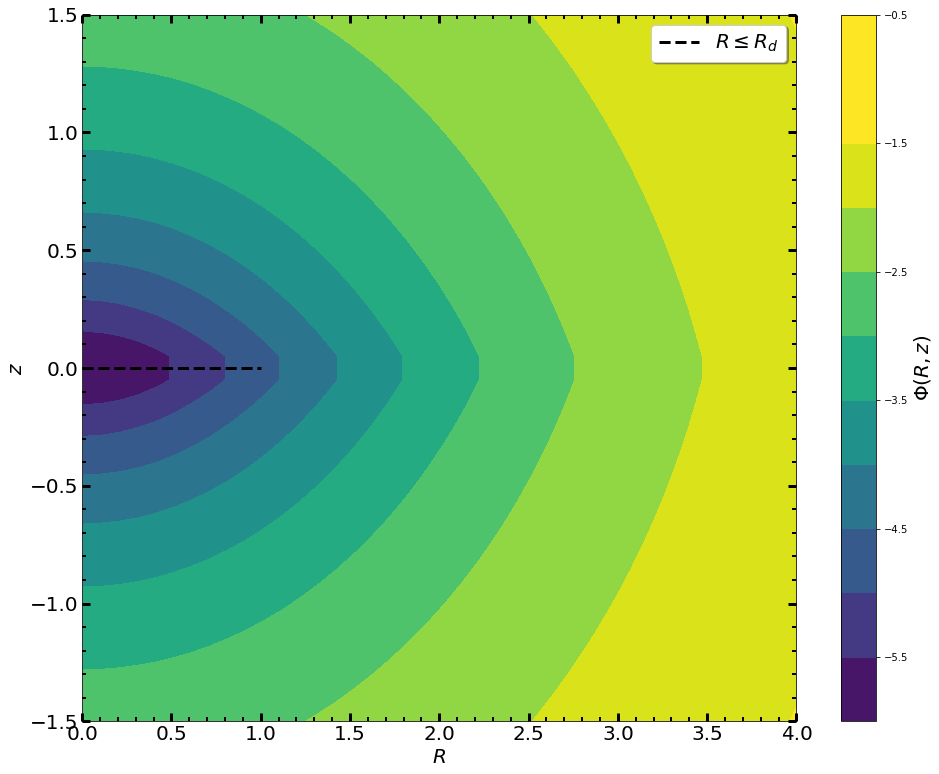

In [6]:
plt.figure(figsize=(16,13))

cp = plt.contourf(X,Y,Phi,10,vmax=-1.5)
cbar = plt.colorbar(cp)
cbar.set_label(label='$\Phi(R,z)$',size=20)

plt.plot([0,1],[0,0],c='k',lw=3,ls='--',label='$R \leq R_d$')

#radio = plt.Circle((0,0),rd,color='k',fill=False,ls='--',lw=2,label='$R = R_d$')
#plt.gca().add_patch(radio)

plt.xlabel('$R$',fontsize=20)
plt.ylabel('$z$',fontsize=20)

plt.xlim(0,4)
plt.ylim(-1.5,1.5)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

# 27)

#### Como vimos en **15)**, el perfil de velocidad circular de un NFW viene dado por:
### $v_c(r) = \sqrt{\frac{GM(<r)}{r}}$
### $v_c(r) = \sqrt{4 \pi G \rho_0 r_0^3 (\frac{-1}{r_0+r} + \frac{ln(1 + \frac{r}{r_0})}{r})}$
#### Escrita en términos de la $v_V, x$ y $c$:
### $v_c(x) = v_V \sqrt{\frac{1}{x} \frac{f(cx)}{f(c)}}$; $f(X) = ln(1 + X) - \frac{X}{1+X}$; $x = \frac{r}{r_V}$ y $c = \frac{r_V}{r_0}$
#### Entonces, para encontrar la velocidad máxima (y el radio donde ocurre) debemos encontrar el máximo de esta función:
### $r_{max} \Rightarrow \frac{dv_c(r)}{dr} |_{r_{max}} = 0$; con $\frac{d}{dr} = \frac{\partial x}{\partial r} \frac{d}{dx} = \frac{1}{r_V} \frac{d}{dx}$
#### Entonces,
### $v'_c = \frac{d}{dr} v_V \sqrt{\frac{f(cx)}{x f(c)}} = \frac{v_V}{r_V \sqrt{f(c)}} \frac{d}{dx} \sqrt{\frac{f(cx)}{x}}$
#### Como $F(g(X)) = \sqrt{g(X)}$ es una función creciente, $max(F(g(X))) \Rightarrow max(g(X))$. Luego, busco $x$:
### $\frac{d}{dx} \frac{f(cx)}{x} = 0$
### $\therefore \frac{2xc^2 +c}{x(1+xc)^2} - \frac{ln(1+xc)}{x^2} = 0$
#### Buscamos la raíz de esta función numéricamente y obtenemos
### $x_{max}c \approx 2.1626$; *(o, escrito de otra forma: $r_{max} \approx \frac{2.1626}{c} r_V$)*
#### Para encontrar la $v_{max}$, resta reemplazar $x = x_{max} \approx 2.1626/c$ en la ecuación de $v_c(x)$:
### $v_c(x_{max}) = v_V \sqrt{\frac{c}{2.1626} \frac{f(2.1626)}{f(c)}}$
#### Donde
### $\sqrt{\frac{f(2.1626)}{2.1626}} \approx 0.46499$
### $\therefore \frac{v_{max}}{v_V} \approx 0.465 \sqrt{\frac{c}{f(c)}}$

# 28)

#### Volviendo al caso del disco exponencial infinitesimálmente fino, la velocidad circular (para el plano $z=0$) viene dada por:
### $v_c^2(R) = R\frac{\partial \Phi(R,0)}{\partial R} = 4 \pi G \Sigma_0 R_d y^2 [ I_0(y)K_0(y)-I_1(y)K_1(y)) ]$; $y = \frac{R}{2R_d}$
#### Graficamos:

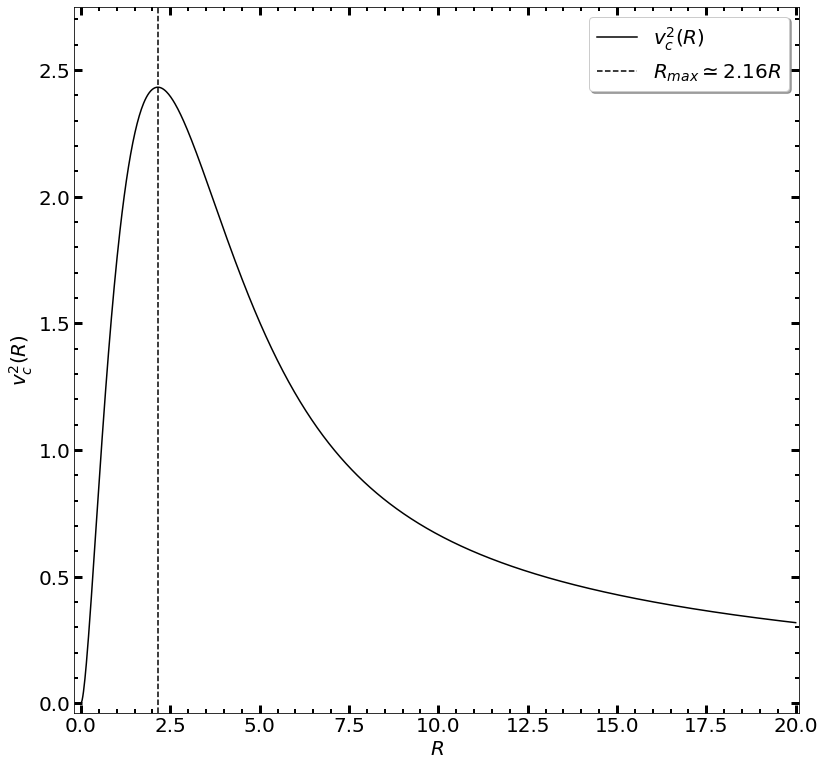

In [15]:
def vel(R):
    Y = 0.5*R*rd
    
    V = 4*np.pi*G*s0*rd*(Y**2)*(i0(Y)*kn(0,Y)-i1(Y)*kn(1,Y))
    return V

R = np.linspace(0.01,20,1000)

vel2 = vel(R)

plt.figure(figsize=(13,13))

plt.plot(R,vel2,c='k',label='$v_c^2(R)$')
#plt.plot(R,np.sqrt(vel2),c='k',label='$v_c(R)$')

#plt.plot(R[300:],0.4+R[300:]**-0.5,c='k',label='$v_c \propto R^{-1/2}$')
plt.axvline(2.16*rd,ls='--',label='$R_{max} \simeq 2.16R$',c='k')

plt.xlabel('$R$',fontsize=20)
plt.ylabel('$v^2_c (R)$',fontsize=20)

plt.xlim(-0.2,20.1)
plt.ylim(-0.04,2.75)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

# 29)

#### El momento angular total de un disco exponencial viene dado por:
### $J_d = 2\pi \int_0^{\infty} Rv_c(R)\Sigma(R)RdR$; con
### $v_c(R) = \sqrt{4 \pi G \Sigma_0 R_d y^2 [f(y)]}$; $f(y) = I_0(y)K_0(y)-I_1(y)K_1(y))$; $y = \frac{R}{2R_d}$;
### $\Sigma(R) = \Sigma_0 e^{-\frac{R}{R_d}}$
#### Cambiando de variable de integración como $y = \frac{R}{2R_d}$; $dy = \frac{dR}{2R_d}$:
### $J_d = 2 \sqrt{\frac{G}{R_d}} (\pi \Sigma_0)^{3/2} (2R_d)^4 \int_0^{\infty} \sqrt{f(y)} e^{-2y} y^3 dy$
#### Recordemos que
### $M_d = 2\pi \Sigma_0 R_d^2$
#### Acomodando los factores:
### $J_d = (2\pi \Sigma_0 R_d^2)^{3/2} 2^{7/2} \sqrt{GR_d} \int_0^{\infty} \sqrt{f(y)} e^{-2y} y^3 dy$
#### A la integral la calculamos numéricamente:

In [19]:
import scipy.integrate as integrate
#Como antes, def el integrando:

def integrand(y):
    aux1 = np.sqrt((i0(y)*kn(0,y)-i1(y)*kn(1,y)))
    return aux1*(np.exp(-2*y))*(y**3)

I = integrate.quad(integrand,0.001,700)
print(f'La integral vale = {I[0]:.8f} con un error = {I[1]:.8f}')
print(f'Entonces, 2^(7/2) * I = {(2**3.5)*I[0]:.8f}')

La integral vale = 0.09801747 con un error = 0.00000001
Entonces, 2^(7/2) * I = 1.10894110


### $\therefore J_d \approx 1.11 M_d^{3/2} (GR_d)^{1/2}$
#### Por otro lado, veamos la energía total del disco:
### $E = -K = -2 \pi \int_0^{\infty} \frac{v_c^2(R)}{2}\Sigma(R)RdR$
#### Análogamente...
### $E = -\frac{G}{R_d} (2\pi \Sigma_0 R_d^2)^2 2^2 \int_0^{\infty} f(y) e^{-2y} y^3 dy$
#### Calculamos la integral numéricamente:

In [22]:
def integrand(y):
    aux1 = (i0(y)*kn(0,y)-i1(y)*kn(1,y))
    return aux1*(np.exp(-2*y))*(y**3)

I = integrate.quad(integrand,0.001,700)
print(f'La integral vale = {I[0]:.9f} con un error = {I[1]:.9f}')
print(f'Entonces, -2^2 * I = {(-4)*I[0]:.8f}')

La integral vale = 0.036815539 con un error = 0.000000002
Entonces, -2^2 * I = -0.14726216


### $\therefore E \approx -0.147 \frac{G}{R_d} M_d^2$